*Maestría en Ciencias Físicas: Física Computacional Avanzada*

---

# Código para encontrar rigurosamente el mínimo de una función en un intervalo

**Christian Marchen$^{(1)}$, Rodrigo Pineda Mondragón$^{(2)}$**

(1) Maestría en Ciencias Matemáticas, IIMAS, UNAM. GitHub: <a href="https://github.com/hierro40">hierro40</a>.
(2) Maestría en Ciencias Matemáticas, IIMAS, UNAM. GitHub: <a href="https://github.com/rockopm">rockopm</a>

Repositorio del trabajo final <a href="https://github.com/rockopm/FCA-ProyectoFinal">aquí</a>.

---

*
**Abstract: ** El problema de optimización de funciones es ubicuo en el mundo de las matemáticas aplicadas. La física, las finanzas, la biología, las ecuaciones diferenciales y demás ciencias que utilizan las matemáticas como herramienta de estudio convergen en algún punto en algún problema de optimización. Además, la complejidad de los nuevos modelos matemáticos desarrollados en estas ciencias nos obligan a hacer uso de herramientas computacionales cuando estos carecen de soluciones en forma cerradas. Existen métodos numéricos desarrollados para resolver el problema de encontrar el mínimo de una función dada una aproximación inicial, pero la mayoría de estos arrojan soluciones que dependen de esta primera aproximación dada por el usuario. Sin embargo, los métodos para encontrar raíces de funciones han sido extendidos para utilizar intervalos como aproximación inicial, en vez de puntos, por lo que el hecho de que $f'(x) = 0$ implique un punto crítico de $f$ nos ayuda a mejorar estos métodos para encontrar raíces de la derivada de esta función y así concluir si es un mínimo o no. En este trabajo desarrollamos un código rigusoro basado en el **método de Krawczyk** para encontrar los mínimos de una función en un intervalo dado por el usuario. Utilizamos un catálogo de **funciones suaves** para mostrar la efectividad del método.*

## Introducción

Los problemas de optimización en escencia consisten en obtener el valor mínimo $y^*$ de una función $f : D \rightarrow \mathbb{R}$ dada en una región $D$. Es decir:

$$y^* = y^*(f;D) = \inf \{f(x): x \in D \}$$

así como el conjunto de puntos del dominio $D$ donde se alcanza dicho mínimo:

$$E^* = E^*(f:D) = \{ x^* \in D: f(x^*) = y^* \}$$

Para el caso en que el problema de optimización requiera encontrar un valor máximo en vez de un mínimo entonces basta con minimizar la función $-f$ . Se asume que $f$ es continua en su dominio $D$, el cuál es un compacto. Entonces, dado que toda función continua en un intervalo cerrado y acotado alcanza un mínimo, tendremos que el conjunto $E^*$ es no vacío.

Utilizaremos técnicas de análisis de intervalos para ubicar a $y^*$ y $E^*$ en un intervalo suficientemente pequeño para que nos brinde información concluyente. Comenzando con el valor extremo $y^*$ podemos expresarlo como:

$$y^* = \inf \{ y : y \in R(f;D) \},$$

donde $R(f;D) = \{ f(x) : x \in D \}$. Por lo tanto, si podemos encerrar $R(f;D)$ en un intervalo suficientemente pequeño, entonces inmediatamente tendremos un intervalo suficientemente pequeño que encierre a $y^*$. 

Las técnicas a utilizar conocidas son muy similares a los métodos para encontrar ceros, como el método de Newton para intervalos visto en clase. Excluyendo los subconjuntos de $D$, se tratará de resolver el problema:

$$f(x) \leq \bar{y} $$

pero con una $\bar{y}$ variable, que es la cota superior actual de $y^*$. Durante el proceso de resolver esta última expresión encontraremos un valor cada vez más pequeño para $\bar{y}$ , la meta será hacer $\bar{y}$ lo más cercano posible a $y^*$, ya que estaríamos llegando al conjunto deseado:

$$E^* = \{ x^* \in D : f(x^*)\leq y^*\} = \{ x^* \in D : f(x^*)=y^* \}$$

Entonces, deseamos encontrar un intervalo $X$ que contenga a $y^*$. Se pueden utilizar distintos criterios para descartar los subintervalos en la búsqueda. En nuestro caso utilizamos un criterio de bisección para dividir el intervalo de búsqueda y usamos el resulado principal del **método de Krawczyk** para descartar intervalos que no contengan el mínimo$^{[1]}$.

## Método de Krawcyk

El **método de Krawczyk** es una alternativa al método de Newton para encontrar ceros de funciones, pues Krawczyk evita los problemas de dividir entre el intervalo $F'(X)$ cuando estamos haciendo las iteraciones del método de Newton. El método se deriva como sigue.

Se supone que $f \in C^1 (X \in \mathbb{R})$ tiene un cero $x^* \in X$. Expandimos en Taylor alrededor de $x^*$ para obtener:

$$f(x)=f(x^*)+f'(\xi)(x-x^*)$$ 

para algún $\xi$ entre $x$ y $x^*$. Para lo anterior tenemos $f(x^*) = 0$, por ser una raíz. Multiplicamos la expansión por alguna constante $C$:

$$C f(x) = C f'(\xi)(x-x^*)$$

y añadiendo $x^*-x$ en ambos lados de la ecuación tenemos:

$$x^*-x+Cf(x)=(x^*-x)+Cf'(\xi)(x-x^*).$$

Reacomodando términos se obtiene:

$$x^*=x-Cf(x)-(1-Cf'(\xi))(x-x^*).$$

Aunque no conocemos la raíz $x^*$ ni el punto $\xi$, sabemos que ambos puntos pertenecen al dominio $X$. Por lo que podremos acotar ambos y obtener lo siguiente:

$$x^* \in x-Cf(x)-(1-CF'(X))(x-X) \equiv K(X,x,C)$$

*Resultado*: Hemos probado que cualquier cero $x^* \in x$ de $f$ esta acotado por los extremos del **operador de Krawczyk** $K(X,x,C)$, para cualquier $x \in X$ y una $C$ finita. Elegimos $x = m = \textrm{mid}(X)$ y $C=1/f'(m)$ $^{[1,2]}$.

Finalmente el operador de Krawcyk resulta:

\begin{equation}
K(X) = K(X,m,1/f'(m)) = m-\frac{f(m)}{f'(m)}-\frac{1-F'(X)}{f'(m)}[-r,r]
\end{equation}

Donde $r=\textrm{rad}(X)$. Dado un intervalo inicial $X_0$ donde buscamos una raíz $x^*$, definimos la secuencia de intervalos:

$$X_{k+1} = K(X_k) \cap X_k, \qquad k=0,1,2,...$$

como las **iteraciones de Krawczyk** de $X_0$. Sea $m_k = \textrm{mid}(X_k)$. Mientras $f'(m_k) \neq 0$ para toda $k \in \mathbb{N}$, se dice que la secuencia esta *bien definida*. De lo anterior, obtenemos el siguiente resultado.

**Teorema.** Suponiendo que $K(X)$ está bien definido, entonces los siguientes se cumple:

(1) si $X$ contiene una raíz $x^*$ de $f$, entonces el cero también está contenido en $K(X) \cap X$ ;

(2) si $K(X) \cap X = \emptyset$, entonces $X$ no contiene ceros; y

(3) si $K(X) \subseteq \textrm{int}(X)$, entonces $X$ contiene exactamente un cero, donde $\textrm{int}(X) = \{ x : \inf(X) < x < \sup(X) \}$.

**Código.** Llamamos *Krawczyk.jl* al módulo donde se implementa este método y se puede encontrar <a href="https://github.com/rockopm/FCA-ProyectoFinal/blob/master/Krawczyk.jl">aquí</a>.

En el módulo de `Krawczyk.jl` se construye la función `optimiza(X::Intervalo, f::Function, err)` que tiene como argumentos `X::Intervalo` que es el intervalo inicial con que se empieza la iteración de Krawczyk, `f::Function` que corresponde a la función que se desea optimizar, y `err` que es un valor de precisión con que deseamos el resultado aproximado. Esta función devuelve una *n-tupla* de la forma

$$(y^*, X^*),$$

donde $y^*$ es el valor mínimo de la función $f$ y $X^*$ es el intervalo en el dominio donde se encuentra el punto $x^*$ tal que $y^* = f(x^*)$.

## Módulos

###Derivadas.jl

Utilizamos el hecho de que las si $x^*$ es mínimo de $f$ entonces $f'(x^*) = 0$. De esta forma, utilizamos el método de Krawczyk en las derivada de la función $f$ para encontrar los mínimos en un intervalo $X$ de $f$.

Para usar la derivada de una función $f$ dada por el usuarios, sin que dicha derivada se especifíque explícitamente, usamos una extensión del módulos `Derivadas.jl` desarrollado en clase.

En aquella ocasión, en el notebook 6, desarrollamos un módulo que permitía evaluar funciones en un objeto denominado `Derivada(x, x')` en donde se obtenía como resultado un objeto del mismo tipo `Derivada(f, f')` donde `f` es la función $f$ evaluada en el punto $x$ y `f'` es su derivada evaluada en el mismo punto.

Para este trabajo, extendemos el módulo para que este contenga también la segunda derivada de la función, obteniendo como resultados objetos del tipo `Derivada(f,f',f'')`.

**Código.** Éste módulo lo llamamos *Derivadas.jl* y se puede obtener en <a href="https://github.com/rockopm/FCA-ProyectoFinal/blob/master/Derivadas.jl">este</a> repositorio de GitHub.


### Intervalos.jl

Para utilizar intervalos como argumento de las funciones a utilizar, mejoramos a detalle el módulo `Intervalos.jl` hecho en clase. Utilizamos teoremas derivados de la artimética de intervalos para definir el intervalo vacío y las operaciones aritméticas de suma, resta, multiplicación y división $^{[3]}$.

La implementación del módulo y los detalles de las matemáticas relacionadas se pueden encontrar en el <a href="https://github.com/lbenet/MetodosNumericosAvanzados/blob/master/notebooks/07.%20Aritmetica%20de%20intervalos.ipynb">Notebook 7</a> del curso.

**Código.** Llamamos *Intervalos.jl* al módulo dedicado a la aritmética de intervalos, y este lo puedes encontrar en <a href="https://github.com/rockopm/FCA-ProyectoFinal/blob/master/Intervalos.jl">esta dirección</a>.


## Resultados

Para este trabajo de optimización **NO** se utilizaron los métodos directos propuestos por Warwick Tucker $^{[1]}$. Decidimos ser un poco más ambiciosos y creamos una función que obtiene la derivada de una función dada y a partir de esta calcula sus ceros. 

Se tuvo que implementar un módulo adicional (además del módulo de aritmética de intervalos) que permitía calcular derivadas de orden superior y posteriormente vía método de Krawcyk se calcularon los ceros de esta derivada y eligiendo los que correspondieran a los mínimos buscados.

Primero, hacemos uso de los módulos que necesitamos: `Intervalos.jl, Derivadas.jl y Krawczyk.jl`. Además, para obtener las gráficas usamos el módulo `PyPlot.jl`.

In [26]:
using Intervalos, Derivadas, Krawczyk, Funciones, PyPlot

Usamos el módulo `Funciones.jl` creado para probar el método en algunas funciones especiales que se construyeron para este trabajo. Dicho módulo se puede obtener <a href="https://github.com/rockopm/FCA-ProyectoFinal/blob/master/Funciones.jl">aquí</a>.

**1.** La primera función a evaluar es una exponencial multiplicada por un polinomio:

$$CH(x)=e^{x}(x^2-2x+1)$$

para el intervalo $X_{CH} = [0.5,5]$.

In [27]:
### Optimización 
CH(X) = exp(-1*X)*(X^2-2*X+1)
X_CH = Intervalo(0.5,5)
optimiza(X_CH,CH,0.0001)

(3.988006283231586288315309789919095200920387242970849690801630181243700948289968e-35 with 256 bits of precision,[1.000000, 1.000000])

En la gráfica vemos que para el intervalo deseado se tiene un máximo en $x=3$ y un mínimo en $x=1$.

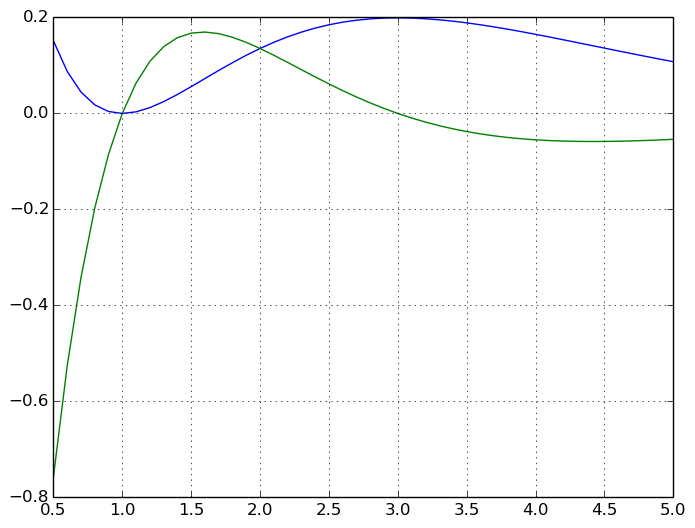

In [28]:
### Gráfica
CH(x) = exp(-x).*(x.^2-2*x+1)
dCH(x)=-exp(-x).*(x.^2-4*x+3)
x = [0.5:0.1:5]
plot(x, CH(x), x, dCH(x))
grid("on")

Se obtiene el resultado buscado de manera exacta (ya conocíamos las raices con anterioridad).

**2.** La segunda función es una exponencial desfasada por una recta:

$$GL(x) = e^{-(x-5)^3}+x$$

para el intervalo $X_{GL} = [5,7]$

En la gráfica podemos ver que esta función presenta máximos y mínimos apenas perceptibles (aunque estos se ven facilmente graficanco la derivada). podemos decir que existe un máximo antes de $x=6$ y un mínimo despues de este valor.

In [29]:
### Optimización
GL(X) = exp(-(X-5)^3) + X
X_GL = Intervalo(5,7)
optimiza(X_GL,GL,0.0001)

(6e+00 with 256 bits of precision,[5.000000, 5.000000])

Ahora intentamos con un intervalo más pequeño que nos regrese como resultado el mínimo entre $6$ y $6.5$.

In [30]:
X_GL2 = Intervalo(6,6.5)
optimiza(X_GL2, GL, 0.00125)

(6.363720016634795973521862048474338851034297900120832195252843338216238019781408e+00 with 256 bits of precision,[6.075584, 6.075596])

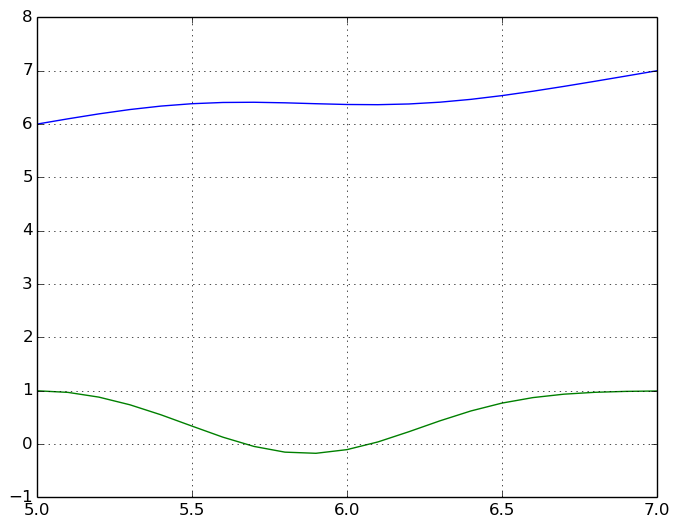

In [31]:
### Gráfica
GL(x) = exp(-(x-5).^3) + x
dGL(x) = 1 - 3*exp(-(x-5).^3).*(x-5).^2
x = [5:0.1:7]
plot(x, GL(x), x, dGL(x))
grid("on")

**3.** La tercera función es un producto entre una función no monotona como el seno, un polinomio y una función monótona como una exponencial.

$$R(x) = x^2 e^{-x} \sin\left(\frac{1}{x^2}\right)$$

Esta función es brava por las ocsilaciones tan rápidas que presenta, por este motivo es que la consideramos interesante para el estudio de máximos y mínimos. Por lo mismo se eligió un intervalo muy pequeño $X_R = [0.2,0.4]$. A continuación vemos las gráficas de manera separada (ya que no es posible visualizar ambas en conjunto debido a los valores que toman una y otra).

Con el apoyo visual sabeos que deberá de encontrar 6 puntos en el intervalo deseado.

In [32]:
### Optimización
R(X) = (X^2)*(exp(-X))*sin(1/X^2)
X_R = Intervalo(0.2,0.4)
result = optimiza(X_R, R, 0.0001)

(-6.747040693069959097705684157025647183364324060009276679929647659459619092379538e-02 with 256 bits of precision,[0.302642, 0.302642])

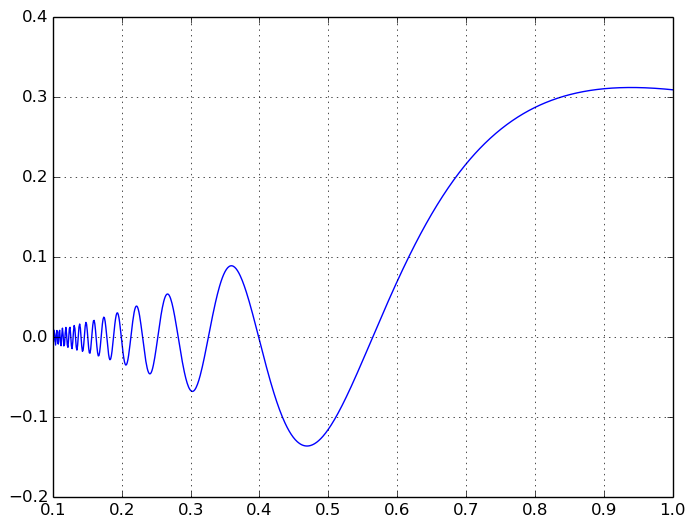

In [33]:
### Gráfica
R(x) = (x.^2).*(exp(-x)).*sin(1./x.^2)
dR(x) = (exp(-x)).*(-(x-2).*(x.^2).*sin(1./x.^2)-2*cos(1./x.^2))./x
x = [0.1:0.001:1]
plot(x, R(x))
grid("on")

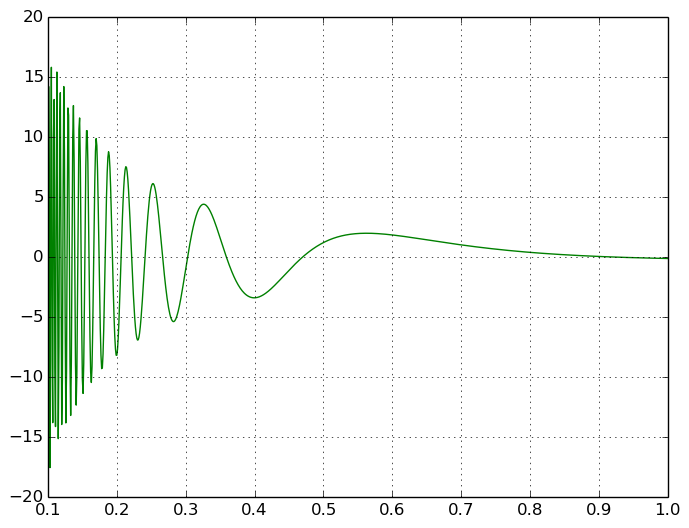

In [34]:
### Derivada
plot(x, dR(x), color="green")
grid("on")

Encontró todos los máximos y minimos en el intervalo deseado a pesar de ser muy pequeño y con muchas oscilaciones.

**4.** La cuarta función es simplemente un polinomio con varios máximos y mínimos (uno de los coeficientes es $\pi$ para hacerlo un poco más interesante:

$$POL(x) = x^4-\pi x^3+3x^2-4x+5$$

Se propuso buscar los máximos y mínimos en un intervalo $X_{POL} = [0,3]$. En la gráfica vemos que solo existe un mínimo entre $1.5$ y $2$.

In [35]:
### Optimización
POL(X) = X^4-pi*X^3+3*X^2-4*X+5
X_POL = Intervalo(0,3)
optimiza(X_POL,POL,0.0001)

(-3.115794651032547524724021777219637091913399777335230841089083311667859102094006e-01 with 256 bits of precision,[1.835838, 1.835838])

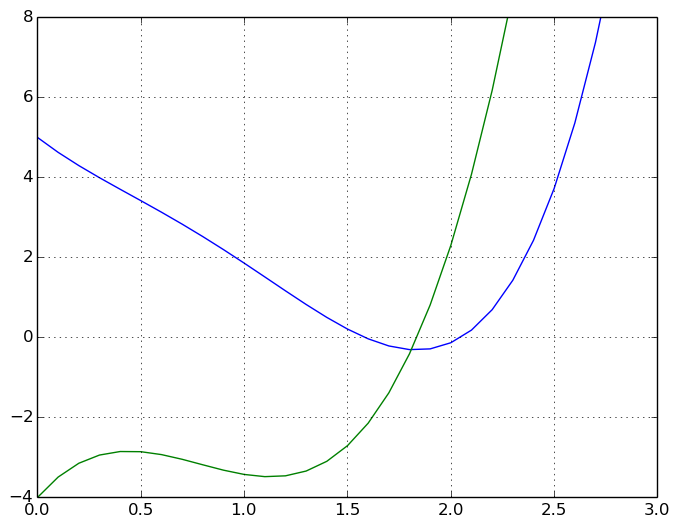

In [36]:
### Gráfica
POL(x) = x.^4-pi*x.^3+3*x.^2-4*x+5
dPOL(x) = 4*x.^3-3*pi*x.^2+6*x-4
x = [0:0.1:3]
v = [0, 3, -4, 8]
plot(x,POL(x),x,dPOL(x))
axis(v)
grid("on")

De nueva cuenta no se tiene problema en encontrar el mínimo buscado.

**5.** La quinta función a evaluar es una función no monótona multiplicada por una raíz cuadrada:

$$ER(x) = \sin \left( \frac{1}{1-x^2} \right) x^{1/2}$$

El intervalo propuesto es $x_{ER} = [1.4, 2.2]$ , también es una función que presenta fuertes oscilaciones cuando $x$ se acerca a $0$, por eso se eligió un intervalo un poco más lejano en este caso. Vemos que existe un mínimo muy bien definido y un máximo un poco más complicado de definir con exactitud.

In [37]:
### Optimización
X_ER = Intervalo(1.4,2.2)
ER(X) = sin(1/(1-X)^2)*(X^(1/2))
optimiza(X_ER,ER,0.0001)

(-1.208747114862240280545643188197091481111159800309371044641075736503248166340761e+00 with 256 bits of precision,[1.461444, 1.461487])

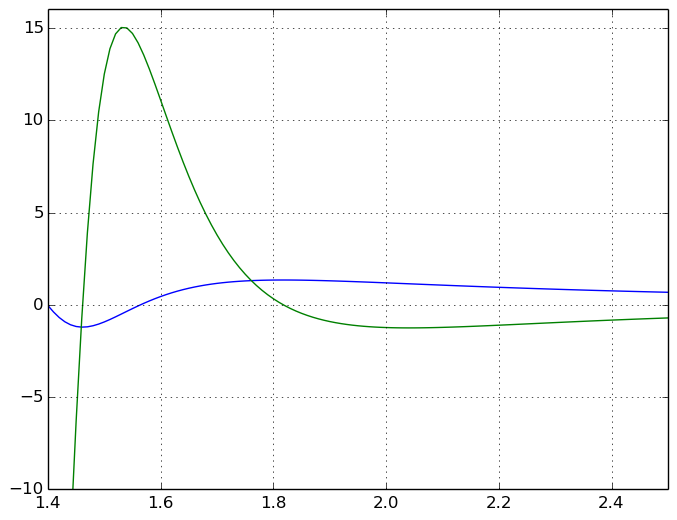

In [38]:
### Gráfica
ER(x) = sin(1./(1-x).^2).*sqrt(x)
dER(x) = (((x-1).^3).*sin(1./(x-1).^2)-4*x.*cos(1./(x-1).^2))./(2*(x-1).^3.*(sqrt(x)))
x = [1.4:0.01:2.5]
v = [1.4, 2.5, -10, 16]
plot(x, ER(x), x, dER(x))
axis(v)
grid("on")

La rutina nuevamente encuentra el máximo y el mínimo sin el mayor problema.

**6.** La sexta función es el producto de una función monótona logarítmica y un polinomio:

$$J(x) = \sqrt{x}(-\log(x))x^2$$

Se propone el intervalo de $X_{J} = [0.45,1.4]$ donde solamente existe un máximo según la gráfica.

In [39]:
### Optimización
X_J = Intervalo(0.45,1.4)
J(X) = sqrt(107)*(-log(X))*X^2
optimiza(X_J,J,0.0001)

(-6.821771922859805658986447009313323693196337323515811754827038103829394978099996e+00 with 256 bits of precision,[1.400000, 1.400000])

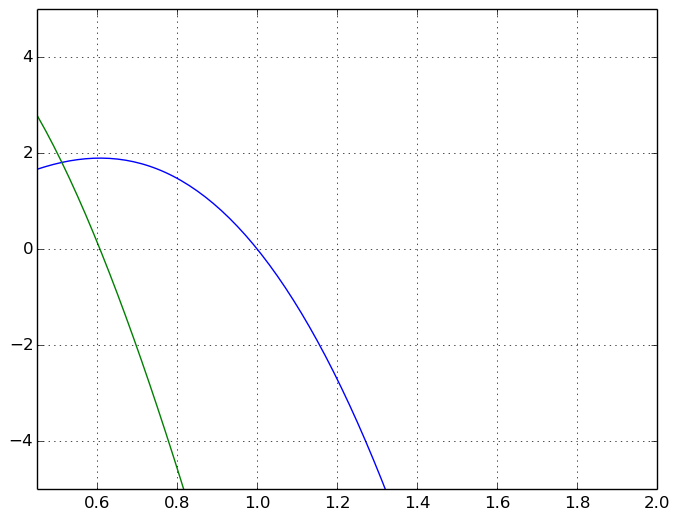

In [40]:
### Grafica
J(x) = sqrt(107)*(log(1./x)).*x.^2
dJ(x) = sqrt(107).*x.*(2*log(1./x)-1)
x = [0.45:0.01:2]
v = [0.45, 2, -5, 5]
plot(x,J(x),x,dJ(x))
axis(v)
grid("on")

¿Y si en vez de el mínimo, deseamos encontrar el máximo?

In [41]:
J2(X) = -sqrt(107)*(-log(X))*X^2
X_J = Intervalo(0.45,1.4)
optimiza(X_J,J2,0.0001)

(-1.902687263778549728169022291559680948799666990855615202464055751059369224188459e+00 with 256 bits of precision,[0.606513, 0.606531])

**7.** Hemos probado hasta ahora funciones con oscilaciones, ahora algunos experimentos con otro tipo de funciones con algun comportamiento más simple pero que será interesante ver como responde la rutina que creamos. Tenemos la función constante

$$CTE(x) = 1$$

In [42]:
### Optimización
CTE(X) = 1
X_CTE = Intervalo(-1,1)
optimiza(X_CTE,CTE,0.0001)

[-1.000000, 1.000000]

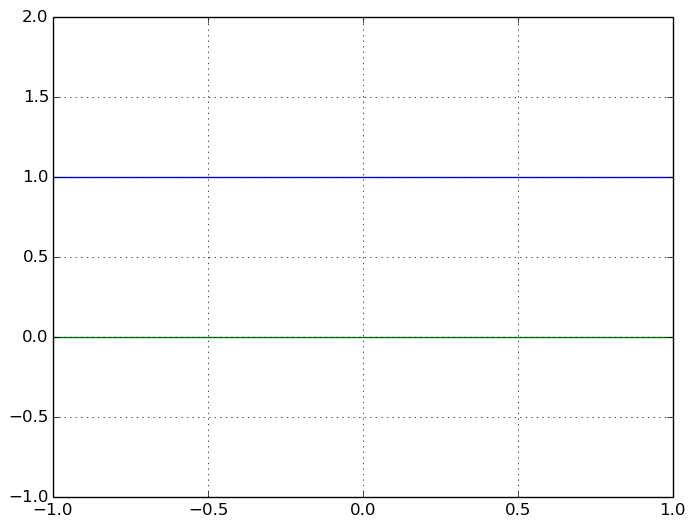

In [43]:
### Gráfica
CTE(x) = ones(201)
dCTE = zeros(201)
x = [-1:0.01:1]
v=[-1, 1, -1, 2]
plot(x, CTE(x), x, dCTE)
axis(v)
grid("on")

Se obtiene lo que esperábamos que era el intervalo completo, ya que la función constante tiene su mínimo en todo su dominio.

**8.** Ahora probamos con la función identidad:

$$ID(x) = x$$

para un intervalo dado queda claro que el resultado deberá ser el límite inferior del intervalo. Vamos a probarla en el intervalo $x_{ID} = [-1,1]$.


In [44]:
### Optimización
X_ID = Intervalo(-1,1)
ID(X) = X
optimiza(X_ID,ID,0.0001)

[-1.000000, -1.000000]

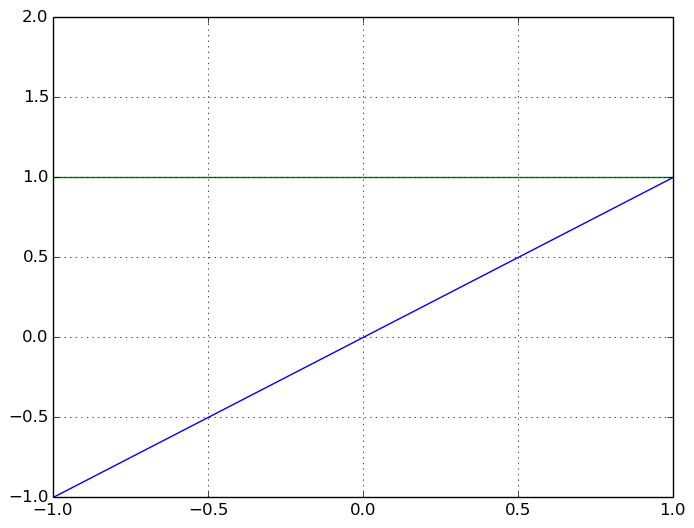

In [45]:
### Gráfica
ID(x) = x
dID = ones(201,1) 
x = [-1:0.01:1]
v=[-1, 1, -1, 2]
plot(x, ID(x), x, dID)
axis(v)
grid("on")

**Referencias**

[1] Tucker, W, (2011). *Validate Numerics: A short introduction to rigorous computations*. Princeton, NJ: Princeton University Press.

[2] Moore, R. E., Baker Kearfott, R., Cloud, M. J. (2009). *Introduction to interval analysis*. Philadelphi, PA: SIAM.

[3] Hickey, T., Ju, Q., van Emdem, M. H.(1999). *Interval arithmetic: from principles to implementation*. Journal of the ACM.